# overview

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

age: age in years<br>
sex: sex<br>
1 = male<br>
0 = female<br>
cp: chest pain type<br>
Value 0: typical angina<br>
Value 1: atypical angina<br>
Value 2: non-anginal pain<br>
Value 3: asymptomatic<br>
trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br>
chol: serum cholestoral in mg/dl<br>
fbs: (fasting blood sugar > 120 mg/dl)<br>
1 = true;<br>
0 = false<br>
restecg: resting electrocardiographic results<br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
thalach: maximum heart rate achieved<br>
exang: exercise induced angina<br>
1 = yes<br>
0 = no<br>
oldpeak = ST depression induced by exercise relative to rest<br>
slope: the slope of the peak exercise ST segment<br>
Value 0: upsloping<br>
Value 1: flat<br>
Value 2: downsloping<br>
ca: number of major vessels (0-3) colored by flourosopy<br>
thal:<br>
0 = error (in the original dataset 0 maps to NaN's)<br>
1 = fixed defect<br>
2 = normal<br>
3 = reversable defect<br>
target <br>
0 = no disease,<br>
1 = disease<br>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [26]:
df=pd.read_csv("heart.csv")

In [27]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
894,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
968,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
655,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
512,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


# preprocessing 

removing faulty data according to  <a href ="https://www.kaggle.com/johnsmith88/heart-disease-dataset/discussion/307455">this discussion</a>

In [28]:
df=df[df['ca']<4]
df.drop(df[df['thal']==0].index, inplace = True)


# Exploratory Data Analysis 

In [29]:
print("sex: ",df.sex.unique())
print("cp: ",df.cp.unique())
print("fbs: ",df.fbs.unique())
print("restcg: ",df.sex.unique())
print("exang: ",df.exang.unique())
print("slope: ",df.slope.unique())
print("ca: ",df.ca.unique())
print("thal: ",df.thal.unique())



sex:  [1 0]
cp:  [0 1 2 3]
fbs:  [0 1]
restcg:  [1 0]
exang:  [0 1]
slope:  [2 0 1]
ca:  [2 0 1 3]
thal:  [3 2 1]


In [30]:
info='''The average age in the data set is {avgAge} ,The oldest is {oldestAge} years, whereas the youngest is {youngestAge} years old 
The average registered cholestrol level is {avgcholestrol}, Maximum level is {maxcholestrol} and the minimum level is {mincholestrol} 
Average Resting blood pressure is {avgBPressure},maximum is {maxBPressure} and minimum is {minBPressure} 
The average maximum heart rate acheived  is {avgHR}  bpm. The Maximum is {maxHR} and the minumum is {minHR}
The average value of st_dpression is {avgst_dpression} the Maximum is {maxst_dpression} and the minimum is {minst_dpression}
'''.format(avgAge=df.age.mean(),oldestAge=df.age.max(),youngestAge=df.age.min(),avgBPressure=df.trestbps.mean(),
          maxBPressure=df.trestbps.max(),minBPressure=df.trestbps.min(),avgcholestrol=df.chol.mean(),
          maxcholestrol=df.chol.max(),mincholestrol=df.chol.min(),avgHR=df.thalach.mean(),maxHR=df.thalach.max(),
          minHR=df.thalach.min(),avgst_dpression=round(df.oldpeak.mean(),2),maxst_dpression=df.oldpeak.max(),minst_dpression=df.oldpeak.min())
print(info)

The average age in the data set is 54.607 ,The oldest is 77 years, whereas the youngest is 29 years old 
The average registered cholestrol level is 246.996, Maximum level is 564 and the minimum level is 126 
Average Resting blood pressure is 131.592,maximum is 200 and minimum is 94 
The average maximum heart rate acheived  is 148.977  bpm. The Maximum is 202 and the minumum is 71
The average value of st_dpression is 1.09 the Maximum is 6.2 and the minimum is 0.0



<AxesSubplot:xlabel='oldpeak'>

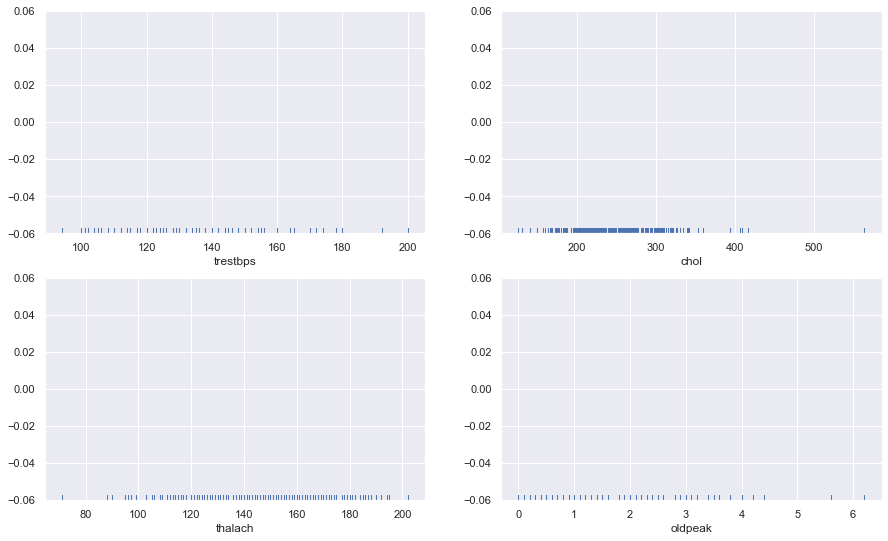

In [31]:
fig, axes = plt.subplots(2, 2,figsize=(15,9))
sns.rugplot(df.trestbps,ax=axes[0,0])
sns.rugplot(df.chol,ax=axes[0,1])
sns.rugplot(df.thalach,ax=axes[1,0])
sns.rugplot(df.oldpeak,ax=axes[1,1])



<AxesSubplot:xlabel='age', ylabel='Count'>

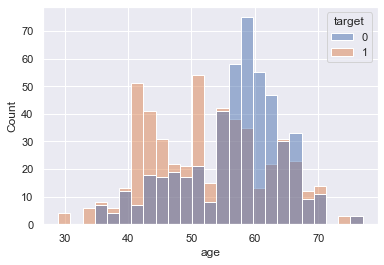

In [32]:
sns.histplot(data=df,x='age',bins=25,hue='target')

In [33]:
df.target.value_counts()/df.shape[0]#data looks balanced

1    0.508
0    0.492
Name: target, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='target'>

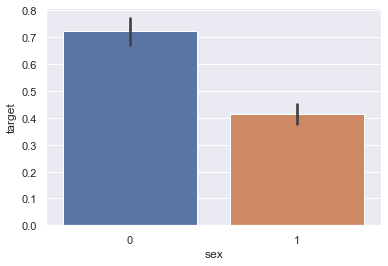

In [34]:
sns.barplot(data=df,x='sex',y='target')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [36]:
x=df.iloc[:,:-1] 
y=df['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test ,test_size=0.5)


In [38]:
#logistic
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

parameters = {'max_iter':[1000], 'C':[.15,.2,.25,.30]}

clf = GridSearchCV(lr, parameters,scoring="recall")

clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.15, 0.2, 0.25, 0.3], 'max_iter': [1000]},
             scoring='recall')

In [39]:
bst_logst=clf.best_estimator_
bst_logst


LogisticRegression(C=0.2, max_iter=1000)

In [40]:
y_predict=bst_logst.predict(X_test)


In [41]:
print (bst_logst.intercept_)
print (bst_logst.coef_)

[2.44682407]
[[ 0.00470239 -1.21424064  0.7045025  -0.01848993 -0.0041212   0.07833423
   0.21719143  0.02300878 -0.60745464 -0.47839907  0.52851782 -1.15733375
  -0.86936887]]


In [42]:

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86        73
           1       0.84      0.94      0.88        77

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

[[59 14]
 [ 5 72]]


In [43]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10,criterion='entropy')
dt.fit(X_train,y_train)
y_predict_dt=dt.predict(X_test)

In [44]:
print(classification_report(y_test, y_predict_dt))
print(confusion_matrix(y_test, y_predict_dt))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      0.97      0.99        77

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[73  0]
 [ 2 75]]


<AxesSubplot:>

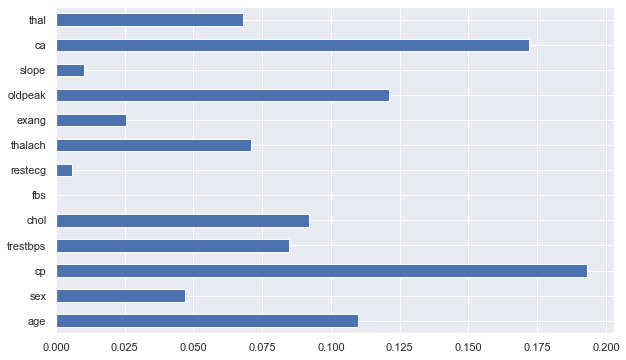

In [51]:
feature_importance = pd.Series(dt.feature_importances_, index=X_train.columns)
feature_importance.plot(kind = 'barh', figsize=(10,6))

In [45]:
from sklearn.ensemble import RandomForestClassifier 
clf_3 = RandomForestClassifier()
clf_3.fit(X_train, y_train)
y_pred_rf=clf_3.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.99      0.99        77

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



<AxesSubplot:>

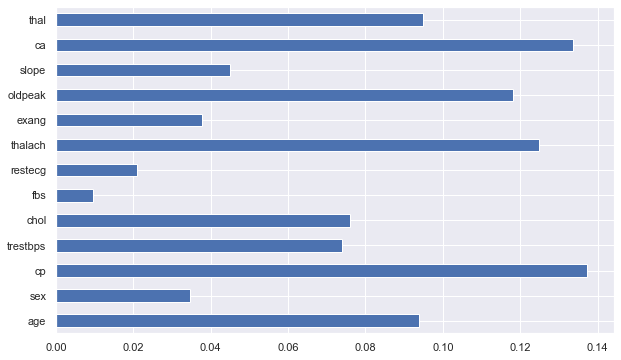

In [50]:
feature_importance = pd.Series(clf_3.feature_importances_, index=X_train.columns)
feature_importance.plot(kind = 'barh', figsize=(10,6))